# tl;dr:
Matplotlib is a super-simple, lightweight library you can use in tandem with pandas to visualize data you're exploring

---

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import mpl_settings
%matplotlib inline
ratings = pd.read_csv('ratings.csv')
tokens = pd.read_csv('token_count.csv')

/Users/ctirol/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  app.launch_new_instance()


In [3]:
df = ratings.merge(tokens,left_on='EpisodeNum',right_on='episode')
tmp = df[['EpisodeNum','Season','Episode','EpisodeName','Rating','UserVotes','unique_token_count','token_count','pct_unique_tokens']]
tmp['EpisodeNum'] = [str(e) for e in tmp['EpisodeNum']]

/Users/ctirol/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


/Users/ctirol/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Open Sans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


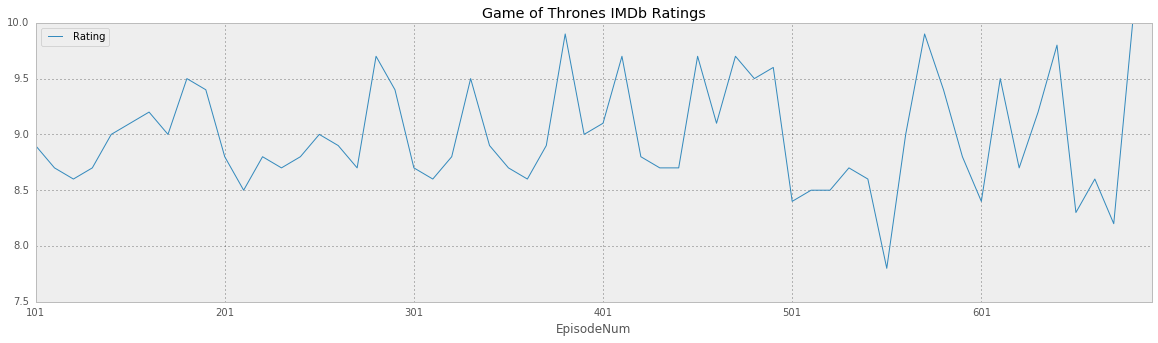

In [4]:
tmp.plot(x='EpisodeNum',y='Rating',title='Game of Thrones IMDb Ratings',figsize=(20,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114914210>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11797e410>], dtype=object)

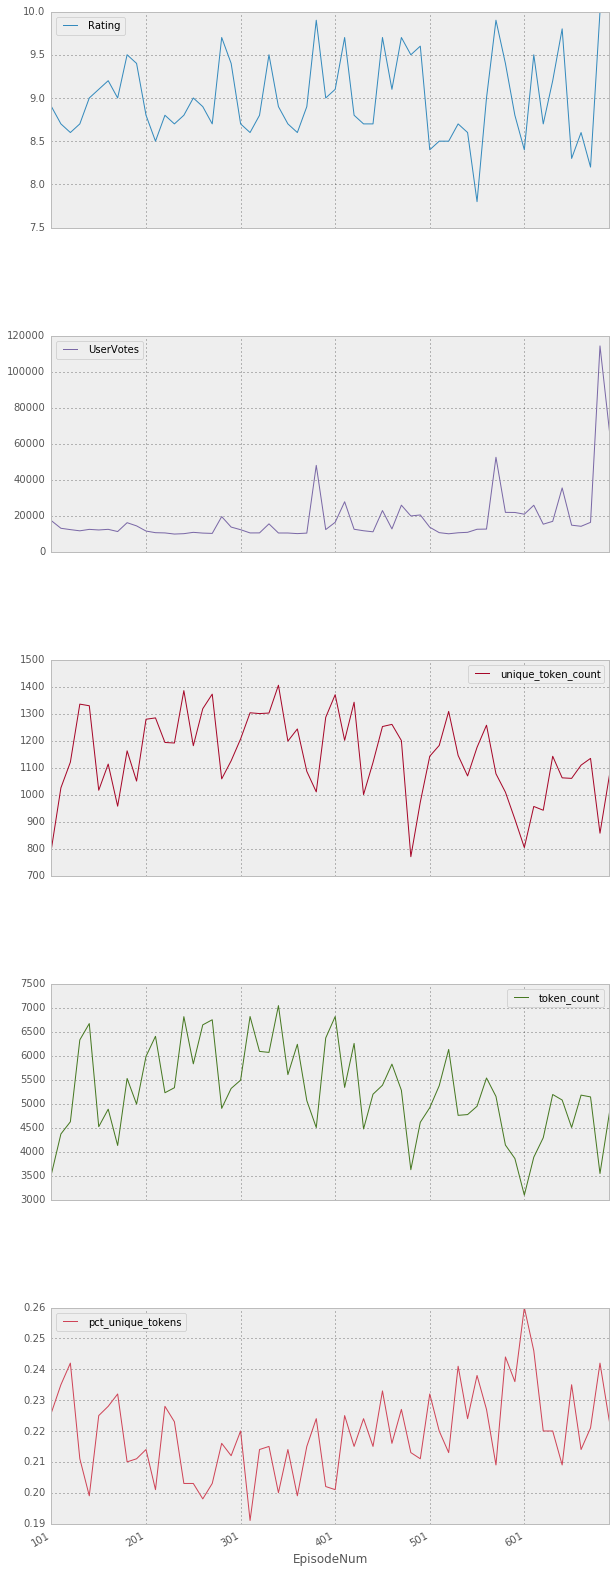

In [5]:
tmp[['Rating','UserVotes','unique_token_count','token_count','pct_unique_tokens','EpisodeNum']].plot(subplots=True,figsize=(10, 30),x='EpisodeNum')

In [6]:
tmp.reset_index(inplace=True)

In [7]:
tmp

,index,EpisodeNum,Season,Episode,EpisodeName,Rating,UserVotes,unique_token_count,token_count,pct_unique_tokens
0,0,101,1,1,Winter Is Coming,8.9,17132,800,3535,0.226
1,1,102,1,2,The Kingsroad,8.7,12945,1025,4367,0.235
2,2,103,1,3,Lord Snow,8.6,12201,1120,4621,0.242
3,3,104,1,4,"Cripples, Bastards, and Broken Things",8.7,11533,1335,6327,0.211
4,4,105,1,5,The Wolf and the Lion,9.0,12337,1329,6667,0.199
5,5,106,1,6,A Golden Crown,9.1,12005,1016,4518,0.225
6,6,107,1,7,You Win or You Die,9.2,12356,1113,4883,0.228
7,7,108,1,8,The Pointy End,9.0,11132,957,4127,0.232
8,8,109,1,9,Baelor,9.5,16048,1162,5523,0.210
9,9,110,1,10,Fire and Blood,9.4,14274,1050,4988,0.211


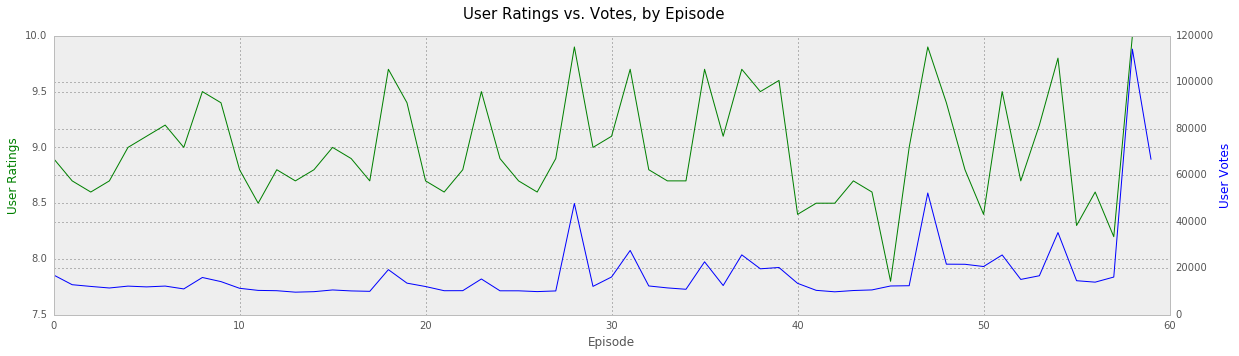

In [8]:
x = tmp.index
y1 = tmp['Rating']
y2 = tmp['UserVotes']

fig, ax1 = plt.subplots(figsize=(20,5))
fig.suptitle('User Ratings vs. Votes, by Episode',fontsize=15)

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Episode')
ax1.set_ylabel('User Ratings', color='g')
ax2.set_ylabel('User Votes', color='b')

plt.show()

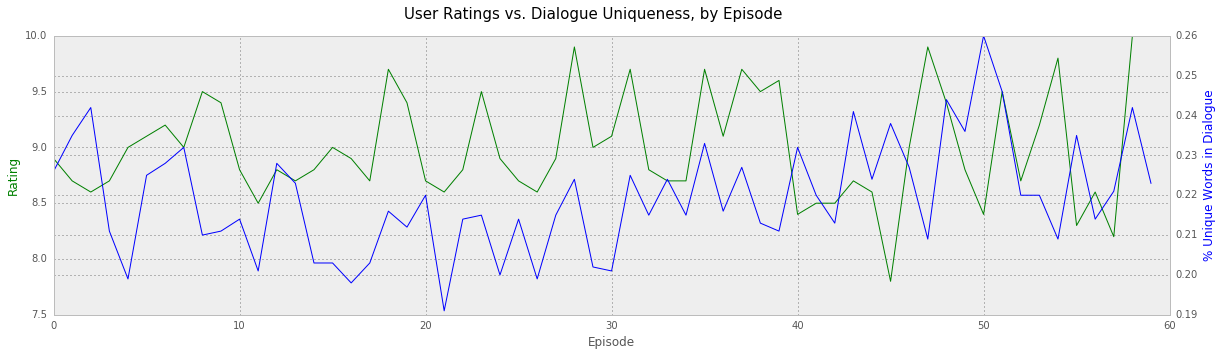

In [9]:
x = tmp.index
y1 = tmp['Rating']
y2 = tmp['pct_unique_tokens']

fig, ax1 = plt.subplots(figsize=(20,5))
fig.suptitle('User Ratings vs. Dialogue Uniqueness, by Episode',fontsize=15)

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Episode')
ax1.set_ylabel('Rating', color='g')
ax2.set_ylabel('% Unique Words in Dialogue', color='b')

plt.show()

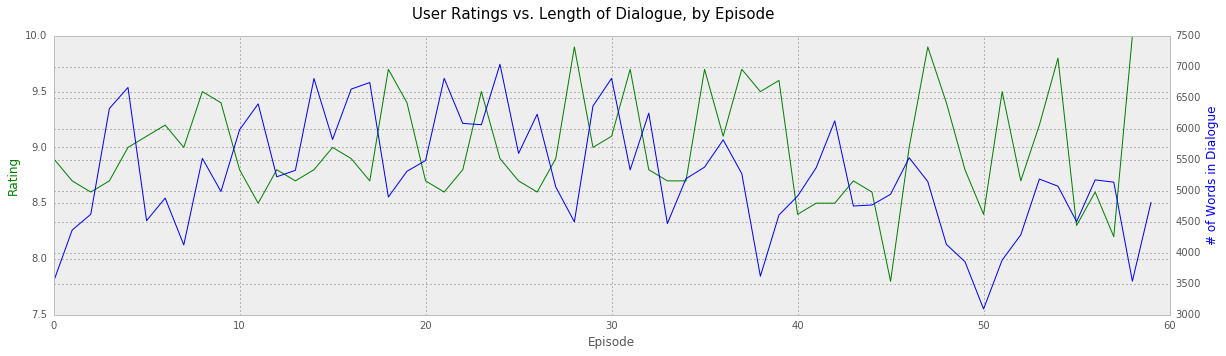

In [10]:
x = tmp.index
y = tmp['Rating']
y2 = tmp['token_count']

fig, ax1 = plt.subplots(figsize=(20,5))
fig.suptitle('User Ratings vs. Length of Dialogue, by Episode',fontsize=15)

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Episode')
ax1.set_ylabel('Rating', color='g')
ax2.set_ylabel('# of Words in Dialogue', color='b')

plt.show()

In [11]:
sent_df = pd.read_csv('got_sentiment.csv')

In [12]:
sent_df

,epID,sentiment
0,101,225
1,102,164
2,103,208
3,104,283
4,105,302
5,106,223
6,107,275
7,108,241
8,109,261
9,110,245


In [13]:
sent_df['epID'] = [str(x) for x in sent_df['epID']]

# Back to df!  Merging sentiment with dialogue and ratings data

In [14]:
df = tmp.merge(sent_df,left_on='EpisodeNum',right_on='epID')

df = df[['EpisodeNum','Season','Episode','EpisodeName','UserVotes','Rating','unique_token_count','token_count','pct_unique_tokens','sentiment']]

df.rename(columns={'EpisodeNum':'episode_id','Episode':'episode',
                   'Season':'season',
                   'EpisodeName':'episode_name',
                   'UserVotes':'user_votes','Rating':'rating'},inplace=True)

In [15]:
df['episode_id'] = [x+1 for x in df.index.values]

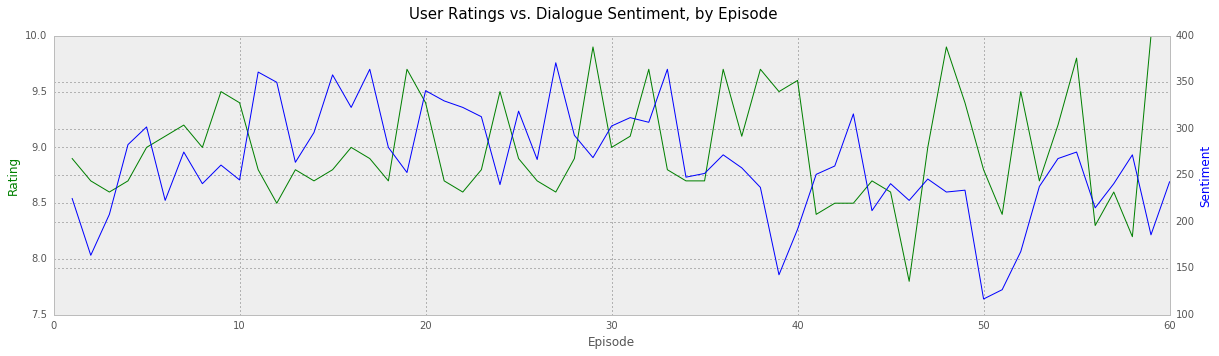

In [16]:
x = df['episode_id']
y2 = df['sentiment']
y = df['rating']

fig, ax1 = plt.subplots(figsize=(20,5))
fig.suptitle('User Ratings vs. Dialogue Sentiment, by Episode',fontsize=15)

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Episode')
ax1.set_ylabel('Rating', color='g')
ax2.set_ylabel('Sentiment', color='b')

plt.show()

In [20]:
df.to_csv('to_ols.csv',index=False)